In [1]:
%pip install pandas matplotlib seaborn scikit-learn imbalanced-learn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

df = pd.read_csv('Books.csv', low_memory=False)


In [3]:
df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
df.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242135,102022,118,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,17627,7535,2,2,2


In [5]:
df.shape

(271360, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [7]:
df.tail()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...
271359,0767409752,A Guided Tour of Rene Descartes' Meditations o...,Christopher Biffle,2000,McGraw-Hill Humanities/Social Sciences/Languages,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...


In [8]:
df.sample(4)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
2323,0465021433,The Evolution of Desire: Strategies of Human M...,David M. Buss,1995,Basic Books,http://images.amazon.com/images/P/0465021433.0...,http://images.amazon.com/images/P/0465021433.0...,http://images.amazon.com/images/P/0465021433.0...
19119,0553575260,A Free Man of Color (Benjamin January (Paperba...,Barbara Hambly,1998,Bantam Books,http://images.amazon.com/images/P/0553575260.0...,http://images.amazon.com/images/P/0553575260.0...,http://images.amazon.com/images/P/0553575260.0...
266290,0836232615,The Little Book of Love Spells,Sophia,1997,Andrews McMeel Publishing,http://images.amazon.com/images/P/0836232615.0...,http://images.amazon.com/images/P/0836232615.0...,http://images.amazon.com/images/P/0836232615.0...
161117,0929488008,Irregular People,Joyce Landorf Heatherley,1989,Balcony Publishing,http://images.amazon.com/images/P/0929488008.0...,http://images.amazon.com/images/P/0929488008.0...,http://images.amazon.com/images/P/0929488008.0...


In [9]:
df.select_dtypes('number').mean()

Series([], dtype: float64)

In [10]:
df.select_dtypes('number').median()

Series([], dtype: float64)

In [11]:
# Ensure DataFrame is not empty
if not df.empty:
    numeric_modes = df.select_dtypes('number').mode()
    if not numeric_modes.empty:
        first_mode = numeric_modes.iloc[0]
        print(first_mode)
    else:
        print("No mode found for numeric columns.")
else:
    print("DataFrame is empty.")


No mode found for numeric columns.


In [12]:
df.iloc[237]['Image-URL-L']


'http://images.amazon.com/images/P/0671027387.01.LZZZZZZZ.jpg'

In [13]:
df.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [14]:
df['Book-Author'] = df['Book-Author'].fillna(df['Book-Author'].mode()[0])
df['Publisher'] = df['Publisher'].fillna(df['Publisher'].mode()[0])
df['Image-URL-L'] = df['Image-URL-L'].fillna(df['Image-URL-L'].mode()[0])


In [15]:
df.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271360 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271360 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271360 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [17]:
df.drop_duplicates(inplace = True)
df

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [18]:
#user data preprocessing

In [19]:
df=pd.read_csv('Users.csv.zip')

In [20]:
df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [21]:
print("Columns: ", list(df.columns))
df.head()

Columns:  ['User-ID', 'Location', 'Age']


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


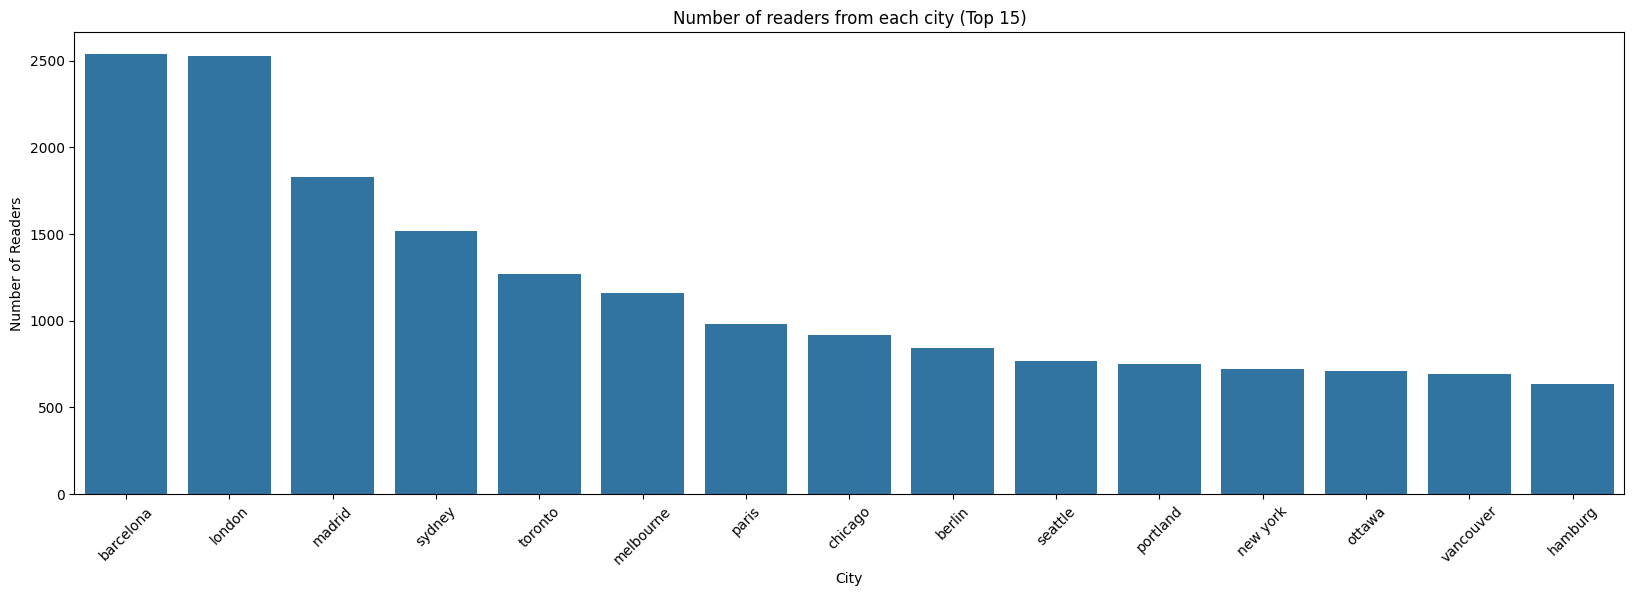

In [22]:
df['City'] = df['Location'].apply(lambda x: x.split(',')[0].strip())

df = df.dropna(subset=['Age'])

plt.figure(figsize=(20, 6))
sns.countplot(x="City", data=df, order=df['City'].value_counts().index[:15])
plt.title("Number of readers from each city (Top 15)")
plt.xticks(rotation=45)
plt.xlabel("City")  
plt.ylabel("Number of Readers")  
plt.show()


In [23]:
df.describe()

,User-ID,Age
count,168096.000000,168096.000000
mean,139394.611865,34.751434
std,80561.659564,14.428097
min,2.000000,0.000000
25%,69914.750000,24.000000
50%,139363.500000,32.000000
75%,209162.500000,44.000000
max,278855.000000,244.000000


In [24]:
df.shape

(168096, 4)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168096 entries, 1 to 278854
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   168096 non-null  int64  
 1   Location  168096 non-null  object 
 2   Age       168096 non-null  float64
 3   City      168096 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 6.4+ MB


In [26]:
df.select_dtypes('number').mean()

User-ID    139394.611865
Age            34.751434
dtype: float64

In [27]:
df.select_dtypes('number').median()

User-ID    139363.5
Age            32.0
dtype: float64

In [28]:
df.isnull().sum()

User-ID     0
Location    0
Age         0
City        0
dtype: int64

In [29]:
# Fill missing User-ID values with the mode of the User-ID column
user_id_mode = df['User-ID'].mode()[0]
df['User-ID'] = df['User-ID'].fillna(user_id_mode)

# Fill missing Location values with the mode of the Location column
location_mode = df['Location'].mode()[0]
df['Location'] = df['Location'].fillna(location_mode)

# Fill missing Age values with the mode of the Age column
age_mode = df['Age'].mode()[0]
df['Age'] = df['Age'].fillna(age_mode)


In [30]:
df.isnull().sum()

User-ID     0
Location    0
Age         0
City        0
dtype: int64

In [31]:
print(sorted(list(df['Age'].unique())))

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0, 228

In [32]:
required = df[(df['Age'] >= 10) & (df['Age'] <= 80)]

In [33]:
mean = round(required['Age'].mean())   
mean

35

In [34]:
list_ = df['Location'].str.split(', ')

city = []
state = []
country = []

count_no_state = 0    
count_no_country = 0

for loc in list_:
    if not loc or loc[0].strip() in ['', 'n/a']:
        city.append('other')
    else:
        city.append(loc[0].strip().lower())

    # Handle state
    if len(loc) < 2 or loc[1].strip() in ['', 'n/a']:
        state.append('other')
        count_no_state += 1
    else:
        state.append(loc[1].strip().lower())
        
    
    if len(loc) < 3 or loc[2].strip() in ['', 'n/a']:
        country.append('other')
        count_no_country += 1
    else:
        country.append(loc[2].strip().lower())

df = df.drop('Location', axis=1)

df_city = pd.DataFrame(city, columns=['City'])
df_state = pd.DataFrame(state, columns=['State'])
df_country = pd.DataFrame(country, columns=['Country'])

df = pd.concat([df, df_city, df_state, df_country], axis=1)

print(f'Number of entries without a country: {count_no_country}')
print(f'Number of entries without a state: {count_no_state}')


Number of entries without a country: 2056
Number of entries without a state: 9048


In [35]:
df.drop_duplicates(keep='last', inplace=True)
df.reset_index(drop=True, inplace=True)

In [36]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190054 entries, 0 to 190053
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   User-ID  168096 non-null  float64
 1   Age      168096 non-null  float64
 2   City     168096 non-null  object 
 3   City     123497 non-null  object 
 4   State    123497 non-null  object 
 5   Country  123497 non-null  object 
dtypes: float64(2), object(4)
memory usage: 8.7+ MB


In [37]:
df.head()


,User-ID,Age,City,City,State,Country
0,2.0,18.0,stockton,porto,v.n.gaia,portugal
1,4.0,17.0,porto,albacete,wisconsin,spain
2,6.0,61.0,santa monica,barcelona,barcelona,spain
3,10.0,26.0,albacete,ferrol / spain,alabama,spain
4,11.0,14.0,melbourne,cologne,nrw,germany


In [38]:
#Books rating csv

In [39]:
df=pd.read_csv('Ratings.csv.zip')

In [40]:
df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [41]:
print("Columns: ", list(df.columns))
df.head()

Columns:  ['User-ID', 'ISBN', 'Book-Rating']


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [42]:
df.isnull().sum() 

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [43]:
from pandas.api.types import is_numeric_dtype


if is_numeric_dtype(df['Book-Rating']):
    print("The 'Book-Rating' column is numeric.")
else:
    print("The 'Book-Rating' column is not numeric.")

The 'Book-Rating' column is numeric.


In [44]:
print(is_numeric_dtype(df['User-ID']))

True


In [45]:
import re

# Flag to check for invalid ISBNs
flag = 0

# Regex pattern to check for invalid characters in ISBN
reg = "[^A-Za-z0-9]"

for x in df['ISBN']:
    z = re.search(reg, x)  # Use 're' instead of 'res'
    if z:
        flag = 1
        break  # No need to check further if an invalid ISBN is found

if flag == 1:
    print("False")  # Indicates there is at least one invalid ISBN
else:
    print("True")   # Indicates all ISBNs are valid

False


In [46]:
books = pd.read_csv('Books.csv',low_memory=False)
df = pd.read_csv('Ratings.csv.zip')

# List of valid ISBNs from the books dataset
bookISBN = books['ISBN'].tolist()

# Regular expression to match non-alphanumeric characters
reg = "[^A-Za-z0-9]"

# Iterate over the rows of the ratings DataFrame
for index, row_Value in df.iterrows():
    z = re.search(reg, row_Value['ISBN'])
    if z:
        f = re.sub(reg, "", row_Value['ISBN'])
        if f in bookISBN:
            df.at[index, 'ISBN'] = f

# Print the updated DataFrame
print(df)

         User-ID         ISBN  Book-Rating
0         276725   034545104X            0
1         276726   0155061224            5
2         276727   0446520802            0
3         276729   052165615X            3
4         276729   0521795028            6
...          ...          ...          ...
1149775   276704   1563526298            9
1149776   276706   0679447156            0
1149777   276709   0515107662           10
1149778   276721   0590442449           10
1149779   276723  05162443314            8

[1149780 rows x 3 columns]


In [47]:
import pandas as pd
print(df.columns)
df.columns = df.columns.str.strip().str.lower()

if 'isbn' in df.columns:
    df['isbn'] = df['isbn'].str.upper()
else:
    print("Column 'ISBN' not found in the DataFrame.")


Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')


In [48]:
df.drop_duplicates(keep='last', inplace=True)
df.reset_index(drop=True, inplace=True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149776 entries, 0 to 1149775
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   user-id      1149776 non-null  int64 
 1   isbn         1149776 non-null  object
 2   book-rating  1149776 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [50]:
df.head()

,user-id,isbn,book-rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [51]:
books = pd.read_csv('Books.csv',low_memory=False)  
ratings = pd.read_csv('Ratings.csv.zip') 
users = pd.read_csv('Users.csv.zip')  
dataset = pd.merge(books, ratings, on='ISBN', how='inner')
dataset = pd.merge(dataset, users, on='User-ID', how='inner')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031136 entries, 0 to 1031135
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ISBN                 1031136 non-null  object 
 1   Book-Title           1031136 non-null  object 
 2   Book-Author          1031134 non-null  object 
 3   Year-Of-Publication  1031136 non-null  object 
 4   Publisher            1031134 non-null  object 
 5   Image-URL-S          1031136 non-null  object 
 6   Image-URL-M          1031136 non-null  object 
 7   Image-URL-L          1031132 non-null  object 
 8   User-ID              1031136 non-null  int64  
 9   Book-Rating          1031136 non-null  int64  
 10  Location             1031136 non-null  object 
 11  Age                  753301 non-null   float64
dtypes: float64(1), int64(2), object(9)
memory usage: 94.4+ MB


In [52]:
## Explicit Ratings Dataset
dataset1 = dataset[dataset['Book-Rating'] != 0]
dataset1 = dataset1.reset_index(drop = True)
dataset1.shape

(383842, 12)

In [53]:
## Implicit Ratings Dataset
dataset2 = dataset[dataset['Book-Rating'] == 0]
dataset2 = dataset2.reset_index(drop = True)
dataset2.shape

(647294, 12)

In [54]:
dataset1.head()


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",NaN
1,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,8,5,"timmins, ontario, canada",NaN
2,0887841740,The Middle Stories,Sheila Heti,2004,House of Anansi Press,http://images.amazon.com/images/P/0887841740.0...,http://images.amazon.com/images/P/0887841740.0...,http://images.amazon.com/images/P/0887841740.0...,8,5,"timmins, ontario, canada",NaN
3,1552041778,Jane Doe,R. J. Kaiser,1999,Mira Books,http://images.amazon.com/images/P/1552041778.0...,http://images.amazon.com/images/P/1552041778.0...,http://images.amazon.com/images/P/1552041778.0...,8,5,"timmins, ontario, canada",NaN
4,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998,Brilliance Audio - Trade,http://images.amazon.com/images/P/1567407781.0...,http://images.amazon.com/images/P/1567407781.0...,http://images.amazon.com/images/P/1567407781.0...,8,6,"timmins, ontario, canada",NaN


Text(0.5, 1.0, 'No of books published by a publisher (Top 20)')

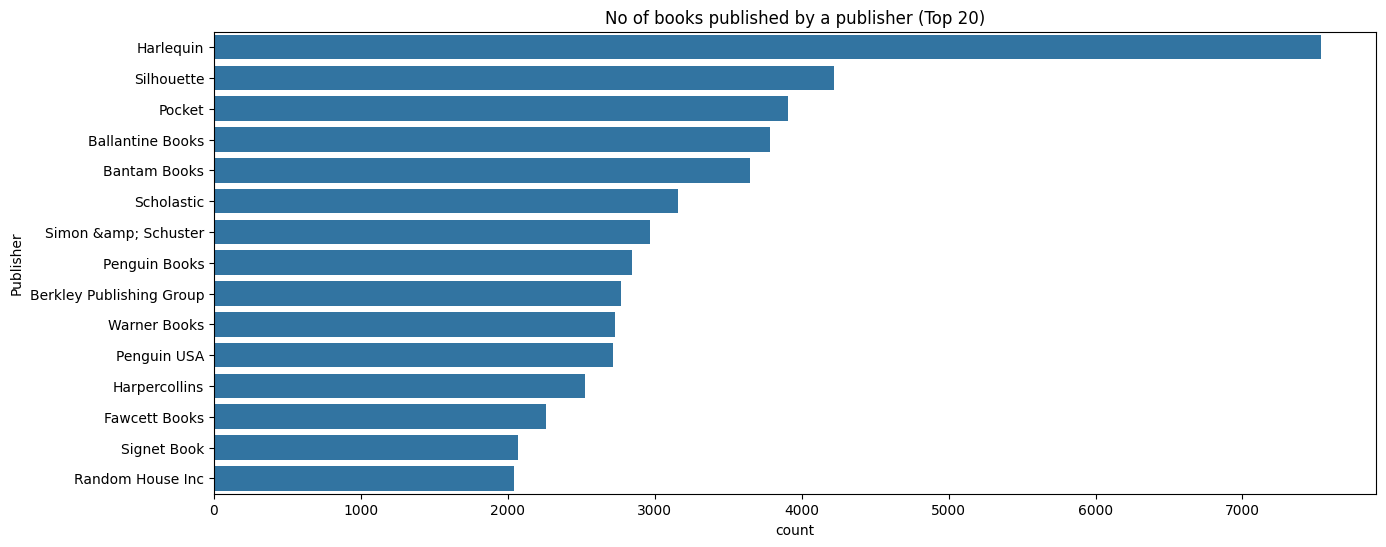

In [55]:
plt.figure(figsize=(15,6))
sns.countplot(y="Publisher", data=books,order=books['Publisher'].value_counts().index[0:15])
plt.title("No of books published by a publisher (Top 20)")

Text(0.5, 1.0, 'Top author and their books (Top 20)')

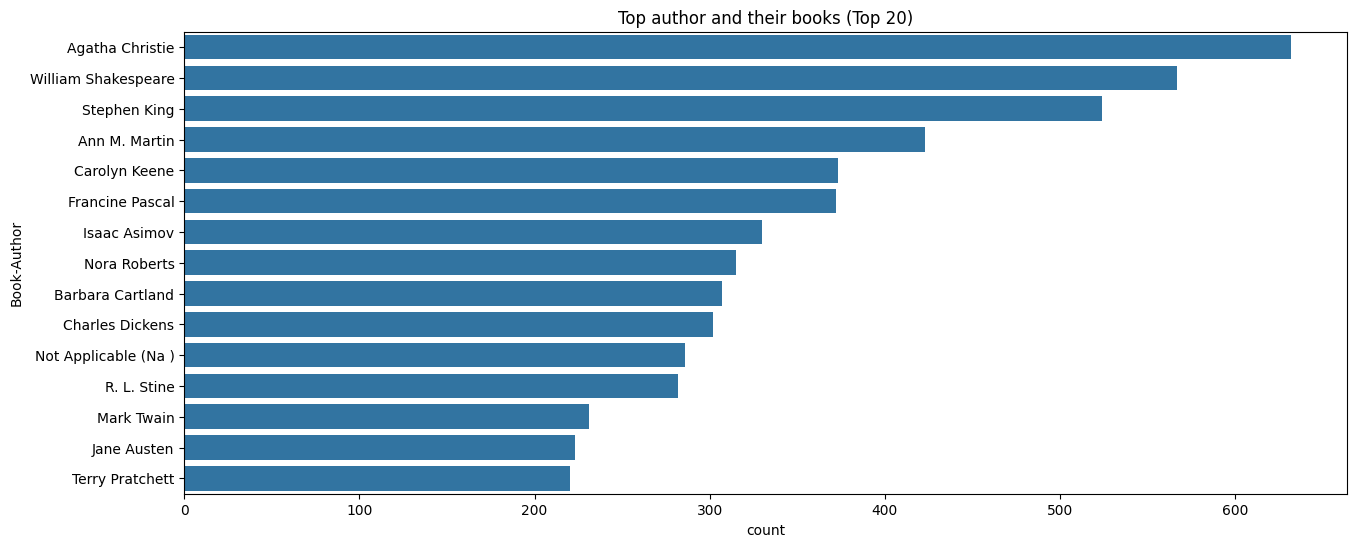

In [56]:
plt.figure(figsize=(15,6))
sns.countplot(y="Book-Author", data=books,order=books['Book-Author'].value_counts().index[0:15])
plt.title("Top author and their books (Top 20)")

<Axes: xlabel='Book-Rating', ylabel='count'>

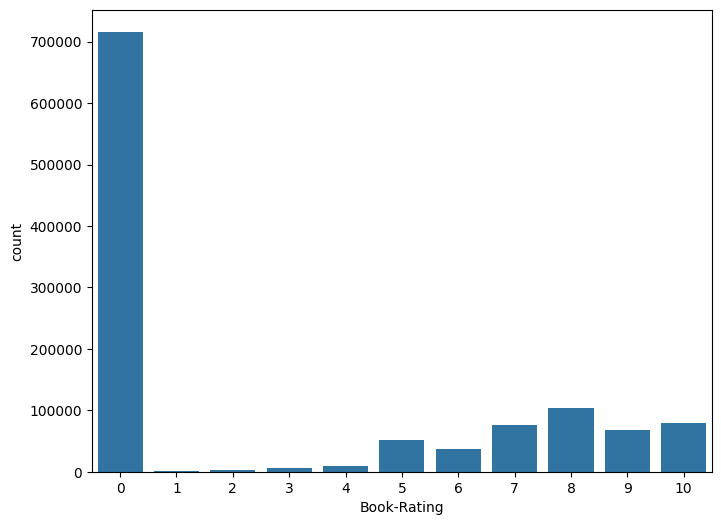

In [57]:
plt.figure(figsize=(8,6))
sns.countplot(x="Book-Rating", data=ratings)

Text(0.5, 1.0, 'Explicit Ratings')

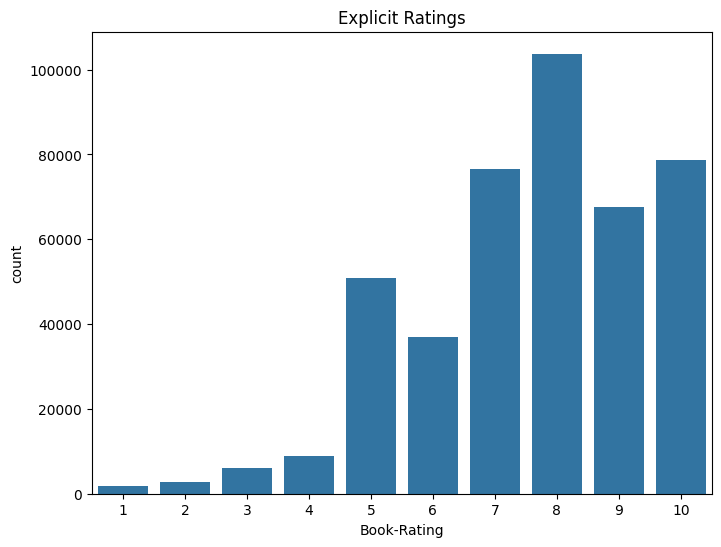

In [58]:
## Explicit Ratings
plt.figure(figsize=(8,6))
data = ratings[ratings['Book-Rating'] != 0]
sns.countplot(x="Book-Rating", data=data)
plt.title("Explicit Ratings")

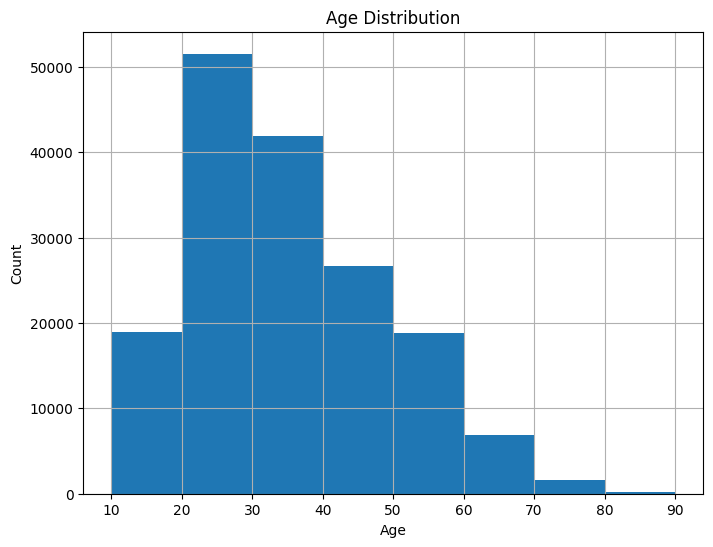

In [59]:
plt.figure(figsize=(8,6))
users.Age.hist(bins=[10*i for i in range(1, 10)])     
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [60]:
if 'City' in users.columns:
    plt.figure(figsize=(20, 6))
    sns.countplot(x="City", data=users, order=users['City'].value_counts().index[:15])
    plt.title("Number of readers from each city (Top 15)")
    plt.xticks(rotation=45)  
    plt.xlabel("City") 
    plt.ylabel("Number of Readers")  
    plt.show()
else:
    print("The 'City' column is not present in the users DataFrame.")


The 'City' column is not present in the users DataFrame.


In [61]:
#Recommendation Systems


In [62]:
bookName = input("Enter a book name: ")
number = int(input("Enter number of books to recommend: "))



In [63]:
def popularity_based(dataframe, n):
    if n >= 1 and n <= len(dataframe):
        data = pd.DataFrame(dataframe.groupby('ISBN')['Book-Rating'].count()).sort_values('Book-Rating', ascending=False).head(n)
        result = pd.merge(data, books, on='ISBN', left_index = True)
        return result
    return "Invalid number of books entered!!"

In [64]:
import ipywidgets as widgets
from IPython.display import display


In [65]:
#popularity based recommendation sysstem

In [66]:
ratings_with_name = ratings.merge(books,on='ISBN')

In [67]:
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [68]:


# Step 3: Convert 'Book-Rating' to numeric, forcing errors to NaN
ratings['Book-Rating'] = pd.to_numeric(ratings['Book-Rating'], errors='coerce')

# Step 4: Merge ratings with books to get Book-Title
ratings_with_title = pd.merge(ratings, books[['ISBN', 'Book-Title']], on='ISBN', how='left')

avg_rating_df = ratings_with_title.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg_rating_df.rename(columns={'Book-Rating': 'avg_rating'}, inplace=True)

# Step 6: Print the average rating DataFrame
print(avg_rating_df)

                                               Book-Title  avg_rating
0        A Light in the Storm: The Civil War Diary of ...    2.250000
1                                   Always Have Popsicles    0.000000
2                    Apple Magic (The Collector's series)    0.000000
3        Ask Lily (Young Women of Faith: Lily Series, ...    8.000000
4        Beyond IBM: Leadership Marketing and Finance ...    0.000000
...                                                   ...         ...
241066                                      Ã?Â?lpiraten.    0.000000
241067                     Ã?Â?rger mit Produkt X. Roman.    5.250000
241068                                Ã?Â?sterlich leben.    7.000000
241069                              Ã?Â?stlich der Berge.    2.666667
241070                                  Ã?Â?thique en toc    4.000000

[241071 rows x 2 columns]


In [69]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [70]:
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending=False).head(50)

In [71]:
popular_df = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_rating']]

In [72]:
popular_df['Image-URL-M'][0]

'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'

In [73]:
#:Collaborative Filtering Based Recommender System

In [74]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
padhe_likhe_users = x[x].index

In [75]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(padhe_likhe_users)]


In [76]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index


In [77]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]


In [78]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')


In [79]:
pt.fillna(0,inplace=True)


In [80]:
pt


User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
from sklearn.metrics.pairwise import cosine_similarity


In [82]:
similarity_scores = cosine_similarity(pt)


In [83]:
similarity_scores.shape


(706, 706)

In [84]:
import numpy as np
def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
    
    return data

In [85]:
recommend('A Bend in the Road')


[['A Walk to Remember',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446608955.01.MZZZZZZZ.jpg'],
 ['The Last Time They Met : A Novel',
  'Anita Shreve',
  'http://images.amazon.com/images/P/0316781266.01.MZZZZZZZ.jpg'],
 ['Sea Glass: A Novel',
  'Anita Shreve',
  'http://images.amazon.com/images/P/0316089699.01.MZZZZZZZ.jpg'],
 ['Angels',
  'Marian Keyes',
  'http://images.amazon.com/images/P/0060008024.01.MZZZZZZZ.jpg']]

In [86]:
pt.index[545]


"The Handmaid's Tale"

In [87]:
import pickle
pickle.dump(popular_df,open('popular.pkl','wb'))

In [88]:
books.drop_duplicates('Book-Title')


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271354,0449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,1993,Ballantine Books,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [89]:
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(books,open('books.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))